In [10]:
from utils import get_max_angle
import numpy as np
accel_dist = 0.1
min_pot = 513
max_pot = 635
center_pot = 594

In [67]:
dt = 0.001
input_str = \
'''
20,10,378,
32,-10,378,
-24,8,378,
24,-6,378,
52,14,377,
20,-3,378,
-12,-22,378,
20,-5,378,
32,-19,378,
76,10,379,
-60,-5,378,
48,-1,378,
60,4,378,
44,-9,378,
12,2,377,
-12,-5,379,
-92,10,378,
0,5,377,
44,-7,378,
-24,-4,378,
24,-9,380,
40,20,380,
-116,12,377,
40,8,378,
-92,14,377,
12,-3,378,
-12,5,379,
24,-2,377,
-16,22,378,
-12,13,378,
56,7,378,
-68,-1,378,
-76,-7,378,
44,8,377,
-96,-7,378,
80,2,377,
124,-1,378,
-16,-15,378,
44,3,378,
16,-18,378,
-88,13,378,
-44,14,378,
-92,-7,378,
8,8,378,
-8,-7,378,
8,8,378,
64,12,379,
-16,23,378,
-24,14,378,
-12,-8,379,
12,-2,379,
8,-12,378,
44,20,378,
40,-4,378,
12,-11,378,
12,4,378,
44,-22,378,
48,0,378,
4,-9,378,
16,13,377,
-56,-3,378,
44,-13,378,
-76,-7,378,
8,-2,378,
28,10,378,
16,6,380,
-60,-2,377,
-12,11,378,
4,-10,378,
-24,15,378,
92,6,377,
84,20,378,
-24,8,379,
36,-9,377,
12,8,379,
12,-12,378,
-24,4,378,
84,0,378,
96,2,378,
-88,1,378,
-36,-20,378,
20,9,378,
56,-7,377,
12,5,378,
-64,0,378,
-20,5,380,
-40,5,378,
104,-9,379,
-36,23,378,
64,0,378,
36,4,378,
-24,13,378,
92,-4,378,
-4,10,379,
-84,-2,378,
16,2,378,
-8,2,378,
56,-7,377,
56,3,378,
-24,-12,378,
64,12,378,
16,0,377,
-8,1,378,
8,5,378,
40,-4,380,
44,12,377,
12,-2,378,
12,2,378,
12,4,378,
-8,-7,378,
12,2,378,
-84,5,378,
16,12,378,
-12,-9,378,
48,2,379,
-48,1,378,
104,-6,379,
84,3,378,
8,-10,378,
-72,3,378,
-16,8,377,
44,-3,378,
-48,19,378,
4,-6,378,
20,37,378,
-60,10,378,
-60,-3,378,
-56,6,378,
12,-10,378,
-40,16,377,
-28,28,378,
16,32,378,
12,4,377,
-12,-12,377,
-32,5,378,
-40,-7,379,
108,21,378,
12,-2,378,
60,-20,378,
24,-13,378,
16,-26,378,
-16,5,377,
-68,-2,378,
92,7,378,
-56,-7,378,
108,-18,378,
92,-4,378,
124,-7,380,
-48,28,379,
84,7,379,
-68,1,378,
96,-1,377,
44,-12,379,
-16,25,378,
32,10,377,
40,15,378,
-48,-6,378,
0,-14,377,
44,-1,378,
-32,-7,378,
-8,13,378,
-52,14,379,
28,13,378,
0,-7,378,
44,9,377,
20,20,378,
-80,21,380,
8,17,378,
4,-23,378,
0,-12,380,
-44,-3,378,
60,10,378,
-40,2,378,
-76,-7,378,
8,5,378,
-36,-19,378,
60,12,379,
-40,14,378,
20,15,378,
40,10,379,
-48,-5,378,
88,2,378,
68,6,378,
-28,19,377,
-4,8,378,
36,2,378,
-72,-13,378,
32,-13,380,
-60,1,378,
88,0,377,
-32,8,378,
-16,-7,378,
20,-4,377,
12,-6,378,
-24,6,378,
-92,19,378,
-24,-5,378,
-8,-9,380,
32,-23,378,
96,-14,379,
76,12,377,
32,3,379,
-4,16,377,
80,-5,378,
-72,1,378,
28,11,378,
36,17,379,
112,8,378,
4,9,378,
-56,5,377,
-28,-10,378,
60,12,380,
-24,1,378,
56,10,378,
32,1,380,
-4,-14,378,
-16,-3,377,
-48,11,378,
32,13,378,
-108,9,378,
-8,2,378,
-8,-2,378,
32,-6,378,
-24,1,377,
-36,10,378,
-36,13,378,
72,-13,378,
-4,-8,378,
-68,-6,378,
-80,1,378,
-16,10,379,
-60,-4,379,
-32,-2,380,
76,-4,378,
-4,5,378,
-4,2,378,
56,10,378,
-20,-4,378,
-12,-7,380,
72,-8,378,
72,-5,378,
32,20,378,
44,6,378,
-156,1,377,
-36,-21,377,
0,-9,378,
-20,8,379,
-68,8,378,
12,14,378,
-8,0,378,
-100,-15,378,
36,-6,378,
-64,13,378,
0,4,380,
108,-10,379,
56,-14,378,
4,-2,378,
20,7,378,
32,8,378,
-12,8,378,
36,3,378,
44,-15,378,
40,-7,378,
-76,-9,380,
-92,14,379,
92,15,378,
48,7,380,
-20,-1,378,
40,-2,378,
16,12,378,
8,13,378,
0,11,378,
-44,8,378,
-20,-23,380,
68,-1,378,
92,-9,379,
-20,12,377,
20,1,378,
24,0,379,
32,-17,378,
80,-26,377,
56,11,380,
60,8,378,
-20,17,379,
92,3,378,
48,-3,379,
12,-3,379,
-56,11,379,
84,12,378,
0,1,378,
88,8,377,
-24,-13,378,
68,-14,378,
-28,3,378,
-20,1,380,
0,1,379,
36,-11,378,
80,-4,377,
92,3,378,
64,16,378,
-72,3,378,
-80,2,378,
-124,1,378,
68,-15,378,
-8,-5,377,
112,6,378,
-12,-2,379,
-108,5,378,
64,-7,378,
-36,-2,378,
48,-2,378,
76,5,377,
28,11,378,
20,13,379,
-16,1,378,
-140,-5,379,
24,15,378,
0,0,378,
-36,18,379,
-40,-4,378,
76,-24,378,
-8,-20,378,
-24,-24,378,
-72,21,378,
-16,8,377,
-20,12,378,
-12,-13,379,
16,-5,378,
108,23,379,
52,10,378,
8,-8,378,
36,-14,379,
48,-25,378,
-80,-37,378,
48,19,378,
4,25,378,
-116,16,379,
-24,18,377,
-8,-5,378,
20,-4,378,
104,-5,378,
-32,-9,378,
16,-17,377,
-60,4,378,
0,-29,378,
36,-12,378,
-48,5,378,
-4,20,378,
-76,22,378,
-92,-21,379,
-52,4,380,
20,11,378,
44,26,379,
64,4,378,
-32,-3,378,
-4,6,378,
-32,-8,378,
-32,19,378,
16,-6,377,
-60,18,378,
-92,-16,377,
-20,-12,378,
-28,-13,377,
36,33,377,
-36,19,378,
20,-4,378,
72,-23,378,
84,-26,378,
48,8,379,
0,-3,378,
-136,-8,378,
-52,-27,380,
-36,3,378,
112,11,377,
-76,34,378,
12,16,378,
-20,0,378,
20,-4,378,
-4,-23,378,
-76,-3,378,
64,1,378,
-12,13,379,
-24,-2,379,
24,1,378,
-32,8,378,
-8,-5,378,
76,19,378,
64,11,378,
-72,-1,379,
-24,-12,378,
96,-17,378,
-32,4,378,
-4,1,379,
-72,17,378,
4,-10,380,
-32,-4,379,
64,-3,378,
32,26,378,
-176,8,378,
48,-12,378,
16,-14,378,
-32,-24,378,
12,21,379,
-20,16,377,
76,25,378,
-20,-9,378,
-4,-9,377,
-40,-8,378,
-68,-3,378,
-28,11,378,
28,2,378,
92,-8,378,
-12,-13,378,
-44,10,380,
136,5,377,
-40,7,377,
36,-5,378,
-8,-5,378,
-36,-4,378,
84,-14,378,
-52,20,378,
32,3,378,
40,11,379,
80,-9,378,
-8,-8,378,
-8,10,378,
-40,5,378,
-152,19,377,
-28,0,379,
20,-6,378,
8,-9,377,
112,1,379,
32,22,378,
-72,8,377,
-40,-1,378,
4,-20,380,
128,3,377,
28,10,378,
24,10,377,
-40,5,378,
-12,-13,380,
-96,-17,379,
96,5,378,
16,16,379,
-80,9,378,
8,6,378,
-24,-3,378,
-60,-9,378,
-112,7,380,
-64,8,378,
-32,10,378,
84,-16,378,
20,-8,380,
8,-13,379,
-16,6,378,
-8,9,378,
-4,5,378,
12,-3,378,
56,-12,378,
24,-6,379,
164,21,377,
-12,12,378,
40,11,378,
-8,-5,378,
88,-5,378,
-48,-10,379,
-4,12,378,
16,19,379,
112,7,378,
-20,-15,378,
-60,-13,378,
36,0,378,
-88,11,378,
0,8,379,
-40,-1,377,
-76,9,378,
-80,-19,378,
104,-7,378,
-48,19,377,
-44,7,378,
-72,10,378,
4,-13,378,
-4,11,378,
72,0,379,
-12,19,379,
-72,4,378,
28,-13,379,
-4,-14,378,
-32,-17,377,
16,1,378,
12,6,377,
-12,-3,378,
140,-5,379,
-72,0,378,
0,-6,379,
-16,12,377,
32,-1,378,
-60,2,378,
0,-14,378,
60,-16,379,
68,5,378,
72,-9,377,
8,2,378,
84,14,378,
-12,5,378,
-44,-9,379,
-72,6,378,
-56,11,378,
56,7,378,
20,-7,377,
8,1,379,
12,1,378,
-40,7,378,
24,4,378,
68,7,377,
80,8,378,
12,-11,380,
48,7,379,
-40,3,378,
64,9,377,
-48,5,377,
72,-4,378,
40,-3,377,
-56,-21,377,
-92,-15,378,
-28,4,378,
-8,-16,378,
4,-10,378,
20,-12,380,
-24,-3,378,
20,13,378,
24,23,379,
-40,-2,378,
60,-4,378,
8,-18,378,
-32,-20,378,
-16,12,379,
-44,28,378,
-56,15,378,
-40,-12,378,
-8,-19,378,
16,-9,378,
60,6,378,
-20,1,379,
24,4,378,
44,4,378,
8,-4,377,
36,8,378,
-4,12,379,
132,11,377,
-8,6,378,
76,-21,379,
88,3,380,
-40,3,378,
84,7,379,
56,1,377,
16,-8,378,
-8,-13,380,
4,-13,377,
-24,17,379,
16,14,378,
-16,11,378,
-40,5,377,
88,-23,378,
36,2,378,
52,8,378,
-16,14,378,
4,3,378,
4,-8,378,
-44,-2,379,
-56,-6,378,
128,9,378,
-36,-2,378,
-68,-1,378,
-16,-16,378,
48,-4,379,
-48,-4,378,
128,9,378,
52,8,378,
20,-1,379,
8,-3,378,
8,-15,377,
28,7,379,
28,4,378,
-16,0,378,
36,-7,378,
-44,-1,378,
-36,6,378,
8,-5,380,
4,8,378,
-20,9,379,
16,14,379,
20,0,378,
-32,-6,377,
-68,7,378,
4,7,380,
44,12,378,
-4,18,378,
-36,-11,378,
0,-11,379,
56,-8,379,
0,-5,378,
76,5,378,
84,-8,379,
-92,-15,379,
64,-21,378,
-36,3,378,
-8,3,377,
-36,18,378,
-72,6,378,
52,10,378,
-80,2,377,
-24,10,378,
52,7,378,
-20,9,378,
-104,8,378,
120,6,378,
100,-11,380,
88,9,379,
56,5,378,
-24,-3,378,
-16,-10,378,
-96,-8,378,
8,8,378,
-116,0,379,
-44,0,378,
-8,-3,378,
16,-7,378,
-20,-6,378,
-40,3,378,
108,-8,378,
0,-8,378,
72,8,378,
-8,2,377,
28,-1,378,
-60,2,379,
60,7,378,
4,5,378,
4,7,377,
4,1,378,
16,10,380,
-16,-4,378,
-80,1,378,
-76,-4,379,
36,0,379,
-28,-2,378,
-24,-12,378,
48,-10,378,
60,5,378,
28,12,379,
76,20,379,
4,8,378,
0,1,377,
80,1,378,
-96,4,377,
-40,-4,378,
-44,-2,378,
4,-7,378,
-8,11,378,
76,-3,378,
4,0,378,
-32,-8,378,
-88,-9,377,
32,-12,378,
64,-6,378,
56,15,379,
-80,13,378,
-28,-4,377,
36,-2,378,
8,5,377,
64,-1,378,
20,15,380,
-64,3,378,
-48,1,378,
-84,2,378,
-56,-2,378,
-84,4,378,
4,-2,378,
4,3,378,
68,3,378,
84,-5,380,
128,-7,378,
-12,1,377,
-36,6,379,
-40,6,378,
-116,-8,378,
80,-3,377,
-16,-2,378,
36,5,378,
4,2,377,
48,6,378,
28,6,378,
8,-6,378,
48,-2,380,
8,1,380,
32,6,377,
-52,4,377,
-68,0,378,
64,3,378,
20,-5,377,
12,1,378,
48,10,377,
36,5,378,
-24,0,378,
36,-6,378,
-8,6,379,
52,-13,380,
116,3,378,
-88,-3,377,
8,9,379,
-44,-7,378,
-68,-3,379,
8,8,380,
68,8,378,
-68,9,378,
56,1,379,
-48,-4,378,
-4,-2,379,
-36,-5,378,
48,-6,379,
24,10,378,
60,6,378,
16,-4,378,
24,1,378,
56,-7,378,
-88,15,378,
-80,9,379,
-36,-7,377,
20,-2,378,
24,2,378,
52,2,378,
52,-1,378,
72,-4,378,
40,-3,378,
-84,2,378,
60,-7,379,
8,0,378,
0,11,377,
-28,1,378,
72,-4,377,
-96,6,378,
-52,-6,378,
0,1,378,
8,-12,379,
-60,11,377,
4,-5,378,
40,-14,378,
-12,0,379,
-92,-8,378,
44,10,378,
-8,-5,378,
28,4,379,
-52,-9,378,
-60,-11,378,
-32,-2,377,
148,0,378,
-32,18,378,
16,18,378,
64,22,378,
-32,-2,378,
-48,-5,378,
88,-2,380,
116,-16,378,
28,11,378,
-44,-7,378,
48,7,377,
24,6,378,
-8,6,380,
44,0,378,
-36,-8,379,
76,0,378,
-84,-18,379,
-4,-12,378,
-8,-20,378,
8,0,378,
16,-3,378,
-24,-9,378,
-4,4,378,
36,-7,379,
-8,-2,378,
16,-4,377,
16,8,378,
80,4,378,
-20,12,378,
-48,10,380,
24,3,379,
-8,-1,378,
-20,8,378,
-12,1,378,
96,7,378,
-20,4,378,
-40,0,378,
28,1,377,
164,1,378,
132,9,379,
80,-6,377,
8,-5,378,
24,-8,379,
88,2,378,
40,3,379,
32,1,378,
20,0,378,
36,4,378,
40,6,379,
-36,6,377,
-12,2,379,
20,11,378,
24,9,379,
-24,-7,378,
76,7,378,
-80,3,380,
0,-1,378,
52,4,380,
16,7,378,
24,5,378,
36,3,378,
-60,2,379,
36,1,377,
-24,6,377,
-116,1,379,
8,7,378,
84,3,378,
0,-1,378,
8,-6,380,
-20,-5,378,
-16,-1,377,
24,3,378,
-24,-8,378,
-48,6,378,
-92,1,378,
-4,-2,377,
32,-5,377,
100,4,378,
-8,14,378,
-24,9,378,
-84,9,379,
-4,-3,378,
112,8,379,
36,13,379,
-56,8,378,
48,-2,378,
36,-1,377,
-96,-1,378,
92,-3,377,
20,2,377,
48,5,378,
0,-1,378,
32,-5,378,
56,-3,379,
-36,-3,378,
36,-6,378,
20,2,378,
-4,-1,378,
32,-7,377,
-36,-3,378,
64,4,377,
16,9,378,
60,-5,378,
-8,6,380,
84,6,379,
-72,2,378,
24,17,377,
-40,6,378,
32,4,378,
36,12,378,
20,7,380,
-56,8,379,
32,-3,378,
-52,-11,379,
84,-4,379,
-32,4,380,
-120,-6,378,
0,7,378,
0,-1,378,
-20,4,378,
64,6,378,
-36,1,378,
68,-3,377,
8,-9,379,
20,3,378,
-28,1,377,
56,-3,378,
40,1,378,
104,-6,378,
-48,0,378,
-48,-13,377,
-12,0,379,
-72,-4,379,
64,4,380,
-24,5,378,
-64,16,378,
40,-2,378,
64,4,378,
-4,-7,378,
8,5,380,
-88,-6,378,
-52,8,379,
-16,11,379,
32,5,379,
-8,12,378,
-76,-1,378,
-76,8,377,
64,-3,378,
36,-2,378,
56,-1,378,
84,5,378,
16,5,378,
-8,2,378,
72,19,378,
12,10,377,
-40,9,378,
-120,3,378,
80,-3,378,
56,-4,378,
-76,2,378,
-64,0,377,
44,-2,378,
-64,-12,378,
20,2,378,
-32,8,379,
44,9,378,
16,4,378,
72,9,378,
32,6,378,
-60,7,378,
8,6,379,
56,6,378,
-24,15,377,
-16,2,378,
116,-2,379,
64,-6,378,
0,-1,378,
36,-6,378,
60,6,380,
-4,6,377,
-8,3,377,
-96,-3,379,
-40,-6,378,
-24,-6,378,
-28,5,378,
4,2,379,
-28,3,377,
-48,-2,380,
64,-3,378,
-76,4,379,
72,9,378,
32,17,378,
-120,7,378,
-16,-1,379,
32,1,379,
-32,-2,380,
32,15,378,
128,6,377,
48,4,378,
-12,-14,378,
-44,-1,378,
-24,-3,378,
20,-1,377,
0,0,378,
8,4,379,
-20,8,378,
32,-3,379,
-68,0,378,
-36,7,378,
-28,5,378,
20,16,378,
-28,9,378,
-16,-7,378,
-52,-8,380,
-68,-2,378,
-32,-3,378,
12,-3,378,
-40,-1,377,
-60,0,378,
16,-1,378,
-72,3,378,
36,-1,378,
32,7,378,
-64,14,379,
72,-7,379,
-72,0,378,
-40,-5,378,
-84,0,378,
20,10,379,
64,5,378,
84,7,378,
80,-16,378,
-4,-7,378,
8,8,378,
48,16,380,
0,14,378,
-8,13,378,
92,1,378,
-12,7,379,
48,-10,378,
44,-6,379,
20,6,379,
64,-8,377,
28,-6,380,
-16,-3,379,
'''

In [74]:
MIN_POT = 0
MID_POT = 511.5
MAX_POT = 1023

observations = []
for line in input_str.split():
    vals = list(map(int, line.split(',')[:-1]))
    assert len(vals) == 3, line #ay and gz
    ay = vals[0] / 32768 * 2 / accel_dist # g (9.8 meters per second^2) / acc_dist
    gz = vals[1] / 32768 * 500 / 180 * 3.1415 # radians per second
    pot = max(MIN_POT, min(MAX_POT, vals[2]))
    if pot > MID_POT:
        angle = (pot - MID_POT) / (MAX_POT - MID_POT) * get_max_angle()
    else:
        angle = - (MID_POT - pot) / (MID_POT - MIN_POT) * get_max_angle() # radians
    
    # a2 = vals[2] / 32768 * 2
    # eps = (a1**2 + a2**2)**0.5 / accel_dist
    # observations.append(np.array([alpha, w, eps]))
    observations.append([ay, gz, angle])
     

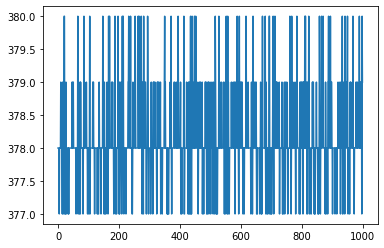

In [69]:
import matplotlib.pyplot as plt
# plt.plot([x[0] for x in observations]) # rads/sec^2
# plt.plot([x[1] for x in observations]) # rads/sec
plt.plot([x[2] for x in observations]) # potentiometer value
# plt.plot(c)

In [73]:
import numpy as np
print(np.std([x[0] for x in observations]))
print(np.std([x[1] for x in observations]))
print(np.std([x[2] for x in observations]))

0.03257292991949401
0.0026544350059753076
0.00034878572423169854


In [39]:
from utils import signal_to_force
la = 0.5
mu = 0.5
num_rolling = 5
force_speed_reaction = signal_to_force(2000+10) - signal_to_force(2000)

n = len(observations)
actions = np.random.binomial(1, p=0.5, size=n)
filtered_observations = []

x = np.array([0., 0., 0.])

F = np.array([
    [1, dt, 0],
    [0, 1, dt],
    [0, 0, 1]
])

z_rolling = [0.] * num_rolling

for i in range(n):
    u_ = actions[i] * force_speed_reaction
    u = np.array([0., 0., u_]) 
    z = observations[i]
    z_av = mu * z + (1 - mu) * np.mean(np.array(z_rolling), axis=0)
    x = la * (F @ x + u) + (1 - la) * z_av
    z_rolling.append(z.copy())
    del z_rolling[0]
    filtered_observations.append(x.copy())


C:\Users\Danill\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
